 
#**STOCK PRICE PREDICTION USING LSTM MODEL**

## **PROJECT  DESCRIPTION**
In this project, I have taken apple stock from "2012-01-01" to "2019-12-17". The closing price is the major attribute for the stock prediction. I have used an artificial neural network called Long Short Term Memory to predict the future price of Apple Stock using the past 60 days clossing price. 

In [ ]:
# Importing Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Fetching the stock price and **DATA PREPROCESSING**

In [29]:
df = web.DataReader('AAPL', data_source = 'yahoo', start='2012-01-01', end='2019-12-17')

In [30]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540046
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607440
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880664
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860232
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426819
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596115
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501350


In [31]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540046
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607440
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880664
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860232


In [32]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426819
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596115
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501350
2019-12-16,70.197502,69.245003,69.250000,69.964996,128186000.0,68.656837
2019-12-17,70.442497,69.699997,69.892502,70.102501,114158400.0,68.791786


In [33]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2003.000000,2003.000000,2003.000000,2003.000000,2.003000e+03,2003.000000
mean,31.798525,31.238634,31.519792,31.527449,2.384275e+08,29.358847
std,12.507078,12.308627,12.398193,12.419818,1.875556e+08,12.724675
min,14.271429,13.753571,13.856071,13.947500,4.544800e+07,12.084597
25%,21.662499,21.228750,21.441607,21.492857,1.104316e+08,18.520226
50%,28.504999,27.915001,28.205000,28.230000,1.747996e+08,25.946520
75%,41.484999,40.531250,40.961250,40.992500,2.992836e+08,39.042219
max,70.442497,69.699997,69.892502,70.102501,1.506120e+09,68.791786


In [ ]:
#Size of dataframe 
df.shape

(2003, 6)

## DATA VISUALIZATION

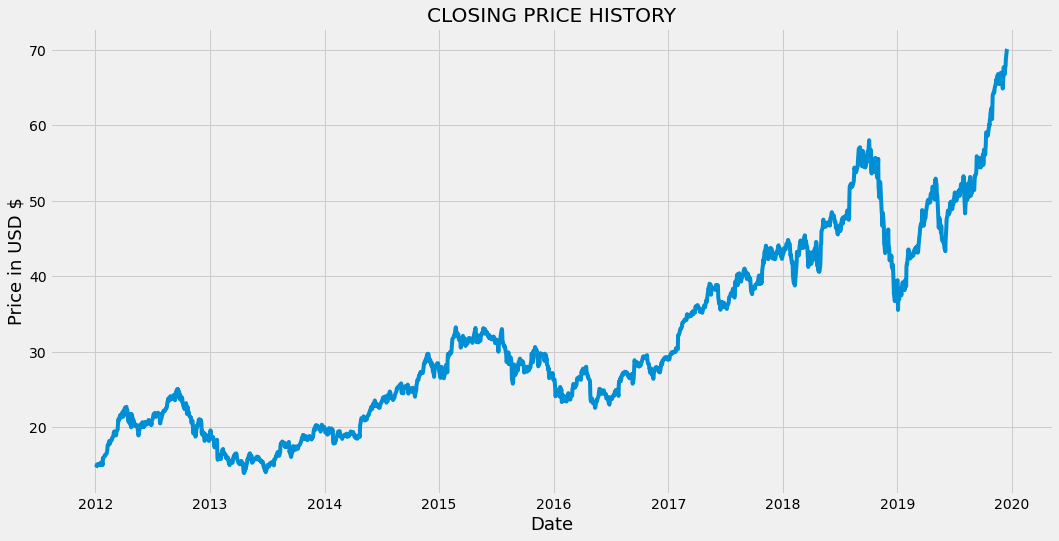

In [ ]:
# VISUALIZE CLOSING PRICE
plt.figure(figsize=(16,8))
plt.title('CLOSING PRICE HISTORY')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price in USD $', fontsize = 18)
plt.show()



## DATA FILTERING

In [ ]:
# New Dataframe with only close column
data = df.filter(['Close'])

# dataframe into array using numpy
dataset = data.values

# no of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)


training_data_len 
                              

1603

In [ ]:
# Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

## DATA TRAINING

In [ ]:
# CREATING TRANING DATA SET 

train_data = scaled_data[0:training_data_len, : ]

# splitting into x_train and y_train

x_train = []
y_train = []

for i in range(60 , len(train_data)):
  x_train.append(train_data[i-60:i, ])
  y_train.append(train_data[i, 0])


  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([[0.01316509],
       [0.01457063],
       [0.01748985],
       [0.02026915],
       [0.01984303],
       [0.02080338],
       [0.02036454],
       [0.01962679],
       [0.01862191],
       [0.02173194],
       [0.02453668],
       [0.02367172],
       [0.01893355],
       [0.02345548],
       [0.01900352],
       [0.03569838],
       [0.03440732],
       [0.0360927 ],
       [0.03973694],
       [0.04194384],
       [0.0417594 ],
       [0.0410789 ],
       [0.04397903],
       [0.04670744],
       [0.04979839],
       [0.05479095],
       [0.0652785 ],
       [0.06543749],
       [0.07127594],
       [0.07563885],
       [0.06814049],
       [0.07102789],
       [0.07097066],
       [0.07906688],
       [0.07791571],
       [0.08004628],
       [0.08387497],
       [0.08600558],
       [0.09214292],
       [0.09661394],
       [0.09790501],
       [0.09835659],
       [0.09071194],
       [0.08886753],
       [0.08914103],
       [0.09632778],
       [0.09835024],
       [0.10

In [ ]:
# Convert x_train and y_train into numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [ ]:
# reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

## LSTM MODEL BUILDING

In [ ]:
# /BUILDING THE LSTM MODEL

model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# COMPILING THE MODEL

model.compile(optimizer = 'adam', loss ='mean_squared_error')

In [ ]:
# training the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 48s 28ms/step - loss: 9.7751e-04


## DATA TESTING

In [34]:
# create testing data set
# new array containing scaled value from 1543 to 2003
# scaled testing dataset

test_data = scaled_data[training_data_len - 60: , : ]

# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , : ]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 :  i, 0])



In [35]:
# convert the data into a numpy

x_test = np.array(x_test)


In [36]:
# reshaping the data innto 3D

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## DATA PREDICTIONS

In [37]:
# get the models predicted price value

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

### Error Calculation

In [38]:
# root mean squared error (rmse) ---how good is model 

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse 

3.106246346727277

### DATA PREDICTION VISUALIZATION

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


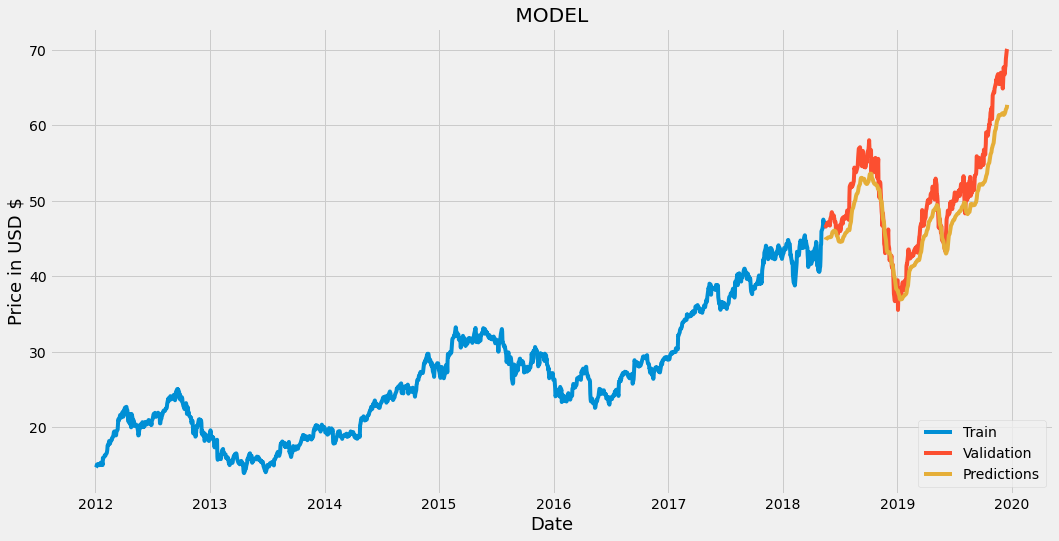

In [ ]:
# Plotting the data

train = data[:training_data_len]
valid = data[training_data_len: ]

valid['Predictions'] = predictions

# visualize the data

plt.figure(figsize =(16,8))
plt.title(' MODEL ')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price in USD $', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
# actual price and predicted price
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,44.842182
2018-05-18,46.577499,44.951447
2018-05-21,46.907501,44.998829
2018-05-22,46.790001,45.040569
2018-05-23,47.090000,45.062065
...,...,...
2019-12-11,67.692497,61.735813
2019-12-12,67.864998,61.902866
2019-12-13,68.787498,62.085632


### PRECTION TESTING


In [ ]:
apple_quote = web.DataReader ('AAPL', data_source = 'yahoo', start ='2012-01-01', end= '2019-12-17')
# new data frame

new_df = apple_quote.filter(['Close'])


# get last 60 days closing value and df into array

last_60_days = new_df[-60:].values

# Scaling 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

# creating test 

X_test = []


# appending past 60 days

X_test.append(last_60_days_scaled)


# X_test into array
X_test = np.array(X_test)

# reshaping to 3D

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))

# get predicted price

pred_price = model.predict(X_test)

# undo scaling

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[63.079746]]


In [ ]:
apple_quote2 = web.DataReader ('AAPL', data_source = 'yahoo', start ='2019-12-18', end= '2019-12-18')

print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64


In this way, Acoording to the data the Apple stock on 2019-12-18 was around 69 and my model predicted that the apple stock would be around 64 $. 